# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# # Define an empty list to fetch the weather data for each city
city_data = []
cit = []
lat = []
lon = []
temp = []
max1 = []
hum = []
clo = []
win = []
sys = []
dat = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# for i in range(5, 11):
for i, city in enumerate(cities):
         
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1        
               
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        cit.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max1.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        clo.append(response['clouds']['all'])
        win.append(response['wind']['speed'])
        sys.append(response['sys']['country'])
        dat.append(response['dt'])

        # Append the City information into city_data list
        weather_dict = {
                          "city": cit, 
                           "lat": lat, 
                           "lng": lon,
                           "Max Temp": max1,
                           "Humidity": hum,
                           "Cloudiness": clo,
                           "Wind Speed": win,
                           "Country": sys,
                           "Date": dat
                         }
 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | rehoboth
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | vilyuysk
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | mutsu
Processing Record 9 of Set 1 | mahibadhoo
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | peace river
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | barclayville
Processing Record 14 of Set 1 | pariaman
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | kilimatinde
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | conceicao do araguaia
Processing Record 22 of Set 1 | kod

Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | fort mcmurray
Processing Record 42 of Set 4 | sierra grande
Processing Record 43 of Set 4 | turabah
Processing Record 44 of Set 4 | drogheda
Processing Record 45 of Set 4 | saudarkrokur
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | gros islet
Processing Record 48 of Set 4 | tahe
Processing Record 49 of Set 4 | aasiaat
Processing Record 0 of Set 5 | pervomayskoye
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | takahagi
Processing Record 3 of Set 5 | westport
Processing Record 4 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 5 | luanda
Processing Record 6 of Set 5 | vredendal
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | tocopilla
Processing Record 9 of Set 5 | remire-montjoly
Processing Record 10 of Set 5 | amungan
Processing Record 11 of Set 5 | nedroma
Processing Record 12 of Set 5 | hasaki
Proc

Processing Record 28 of Set 8 | polyarnyy
Processing Record 29 of Set 8 | gao
Processing Record 30 of Set 8 | kidal
Processing Record 31 of Set 8 | jacmel
Processing Record 32 of Set 8 | wad rawah
Processing Record 33 of Set 8 | nsanje
Processing Record 34 of Set 8 | hotan
Processing Record 35 of Set 8 | roma
Processing Record 36 of Set 8 | fort bragg
Processing Record 37 of Set 8 | swakopmund
Processing Record 38 of Set 8 | aja
Processing Record 39 of Set 8 | maba
Processing Record 40 of Set 8 | mogocha
Processing Record 41 of Set 8 | sciacca
Processing Record 42 of Set 8 | bangor trident base
Processing Record 43 of Set 8 | navapolatsk
Processing Record 44 of Set 8 | mhamid
Processing Record 45 of Set 8 | campbell river
Processing Record 46 of Set 8 | saue
Processing Record 47 of Set 8 | sirjan
Processing Record 48 of Set 8 | pale
Processing Record 49 of Set 8 | dubbo
Processing Record 0 of Set 9 | plastun
Processing Record 1 of Set 9 | arawa
Processing Record 2 of Set 9 | pisco
Proc

Processing Record 19 of Set 12 | tazovsky
Processing Record 20 of Set 12 | dois vizinhos
Processing Record 21 of Set 12 | arraial do cabo
Processing Record 22 of Set 12 | zouerate
Processing Record 23 of Set 12 | jincheng
Processing Record 24 of Set 12 | barcelos
Processing Record 25 of Set 12 | egilsstadir
Processing Record 26 of Set 12 | jangaon
Processing Record 27 of Set 12 | machico
Processing Record 28 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 29 of Set 12 | governador dix sept rosado
Processing Record 30 of Set 12 | ciudad lazaro cardenas
Processing Record 31 of Set 12 | yemva
Processing Record 32 of Set 12 | brownfield
Processing Record 33 of Set 12 | ampara
Processing Record 34 of Set 12 | el haouaria
Processing Record 35 of Set 12 | gaogou
Processing Record 36 of Set 12 | porto novo
Processing Record 37 of Set 12 | aripuana
Processing Record 38 of Set 12 | hihifo
City not found. Skipping...
Processing Record 39 of Set 12 | port saint john's
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(weather_dict, orient='index')
city_data_df = city_data_df.transpose()

# Show Record Count
city_data_df.count()

# Print rows with null data
print(np.where(pd.isnull(city_data_df)))

# remove rows with isnull data
city_data_df = city_data_df.dropna(how='any', axis=0)

(array([566, 566, 566, 566, 566, 566, 566, 566, 567, 567, 567, 567, 567,
       567, 567, 567, 568, 568, 568, 568, 568, 568, 568, 568, 569, 569,
       569, 569, 569, 569, 569, 569, 570, 570, 570, 570, 570, 570, 570,
       570, 571, 571, 571, 571, 571, 571, 571, 571, 572, 572, 572, 572,
       572, 572, 572, 572, 573, 573, 573, 573, 573, 573, 573, 573, 574,
       574, 574, 574, 574, 574, 574, 574, 575, 575, 575, 575, 575, 575,
       575, 575, 576, 576, 576, 576, 576, 576, 576, 576, 577, 577, 577,
       577, 577, 577, 577, 577, 578, 578, 578, 578, 578, 578, 578, 578,
       579, 579, 579, 579, 579, 579, 579, 579, 580, 580, 580, 580, 580,
       580, 580, 580, 581, 581, 581, 581, 581, 581, 581, 581, 582, 582,
       582, 582, 582, 582, 582, 582, 583, 583, 583, 583, 583, 583, 583,
       583, 584, 584, 584, 584, 584, 584, 584, 584, 585, 585, 585, 585,
       585, 585, 585, 585, 586, 586, 586, 586, 586, 586, 586, 586, 587,
       587, 587, 587, 587, 587, 587, 587, 588, 588, 588, 588, 5

In [6]:
# print(np.where(pd.isnull(city_data_df)))
# Display sample data
city_data_df.head()
# city_data_df.tail()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.95,115.0667,24.75,41,0,0.58,AU,1704341027
1,rehoboth,-23.3167,17.0833,20,60,77,2.94,NA,1704341027
2,port lincoln,-34.7333,135.8667,21.5,73,69,4.44,AU,1704340887
3,fortuna,40.5982,-124.1573,9.25,97,100,0,US,1704341027
4,vilyuysk,63.7553,121.6247,-31.67,98,99,2.68,RU,1704341027


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,24.75,41,0,0.58,AU,1704341027
1,rehoboth,-23.3167,17.0833,20.00,60,77,2.94,NaN,1704341027
2,port lincoln,-34.7333,135.8667,21.50,73,69,4.44,AU,1704340887
3,fortuna,40.5982,-124.1573,9.25,97,100,0.00,US,1704341027
4,vilyuysk,63.7553,121.6247,-31.67,98,99,2.68,RU,1704341027


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

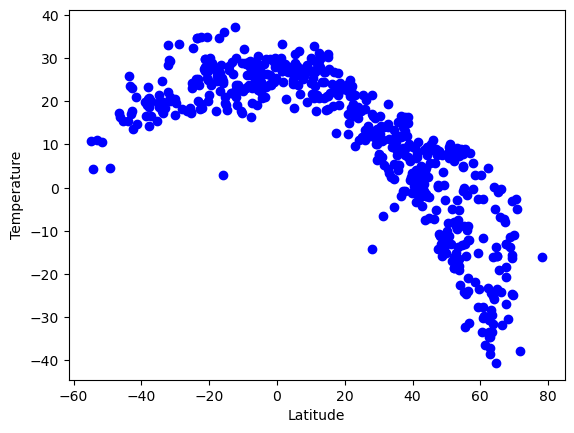

In [15]:
# Build scatter plot for latitude vs. temperature
x_valuesT = city_data_df['lat']
y_valuesT = city_data_df['Max Temp']
plt.scatter(x_valuesT,y_valuesT, c='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

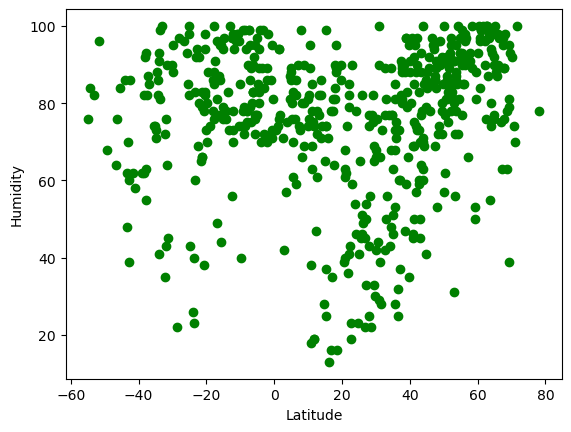

In [16]:
# Build the scatter plots for latitude vs. humidity
x_valuesH = city_data_df['lat']
y_valuesH = city_data_df['Humidity']
plt.scatter(x_valuesH,y_valuesH, c='green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

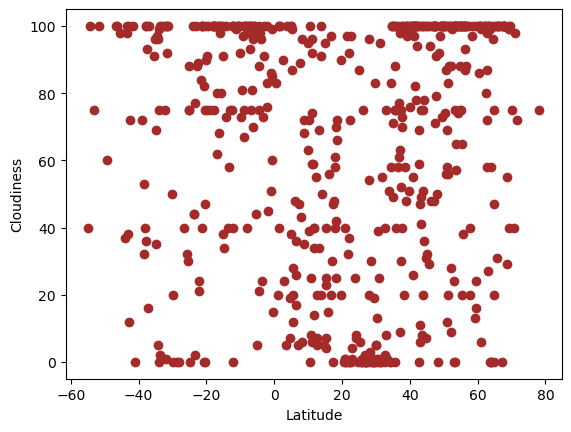

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_valuesC = city_data_df['lat']
y_valuesC = city_data_df['Cloudiness']
plt.scatter(x_valuesC,y_valuesC, c='brown')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

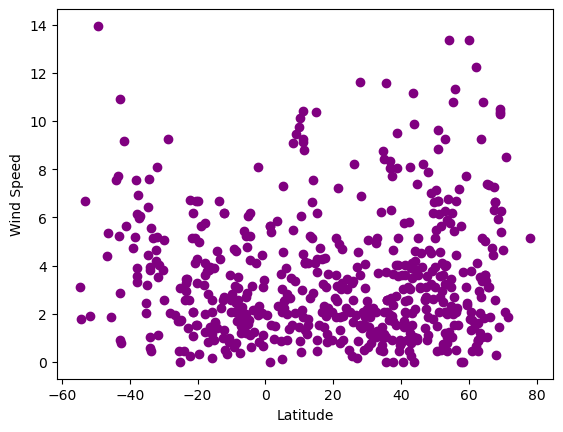

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_valuesW = city_data_df['lat']
y_valuesW = city_data_df['Wind Speed']
plt.scatter(x_valuesW,y_valuesW, c="purple")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['lat'] >= 0]
northern_hemi_df.to_csv("output_data/citiesNorthHem.csv", index_label="City_ID") 

# Display sample data
northern_hemi_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,fortuna,40.5982,-124.1573,9.25,97,100,0.00,US,1704341027
4,vilyuysk,63.7553,121.6247,-31.67,98,99,2.68,RU,1704341027
5,thompson,55.7435,-97.8558,-15.91,85,100,1.54,CA,1704340906
6,udachny,66.4167,112.4000,-31.96,97,100,1.85,RU,1704340921
7,mutsu,41.2894,141.2169,2.24,92,100,4.02,JP,1704341028


In [21]:
# Export as NorthHem.csv file
northern_hemi_df = pd.read_csv("output_data/citiesNorthHem.csv", index_col="City_ID")

# Display sample data
northern_hemi_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,fortuna,40.5982,-124.1573,9.25,97,100,0.00,US,1704341027
4,vilyuysk,63.7553,121.6247,-31.67,98,99,2.68,RU,1704341027
5,thompson,55.7435,-97.8558,-15.91,85,100,1.54,CA,1704340906
6,udachny,66.4167,112.4000,-31.96,97,100,1.85,RU,1704340921
7,mutsu,41.2894,141.2169,2.24,92,100,4.02,JP,1704341028


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['lat'] < 0]
southern_hemi_df.to_csv("output_data/citiesSouthHem.csv", index_label="City_ID")

# Display sample data
southern_hemi_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,24.75,41,0,0.58,AU,1704341027
1,rehoboth,-23.3167,17.0833,20.00,60,77,2.94,NaN,1704341027
2,port lincoln,-34.7333,135.8667,21.50,73,69,4.44,AU,1704340887
9,port-aux-francais,-49.3500,70.2167,4.60,68,60,13.95,TF,1704341028
11,puerto ayora,-0.7393,-90.3518,24.75,95,60,3.12,EC,1704341028


In [23]:
# Export as SouthHem.csv file
southern_hemi_df = pd.read_csv("output_data/citiesSouthHem.csv", index_col="City_ID")

# Display sample data
southern_hemi_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,24.75,41,0,0.58,AU,1704341027
1,rehoboth,-23.3167,17.0833,20.00,60,77,2.94,NaN,1704341027
2,port lincoln,-34.7333,135.8667,21.50,73,69,4.44,AU,1704340887
9,port-aux-francais,-49.3500,70.2167,4.60,68,60,13.95,TF,1704341028
11,puerto ayora,-0.7393,-90.3518,24.75,95,60,3.12,EC,1704341028


###  Temperature vs. Latitude Linear Regression Plot

City_ID
3       2.810404
4     -15.380677
5      -9.087000
6     -17.471343
7       2.267432
         ...    
560    18.313881
561    -1.928746
562    25.511413
564     0.976064
565     3.427926
Name: lat, Length: 389, dtype: float64
y =-0.79x +34.7
The r-value is: 0.7574149253421942


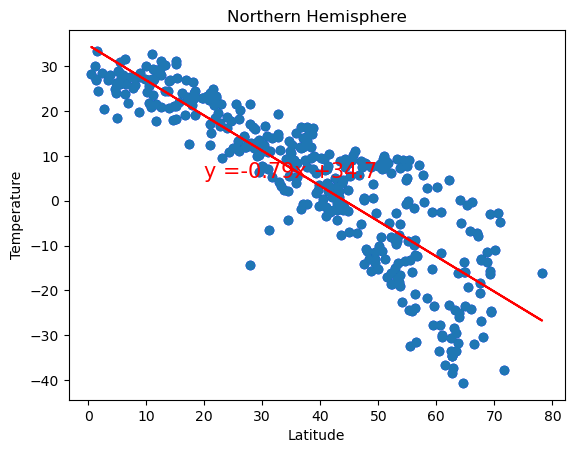

In [24]:
x_valuesNT = northern_hemi_df['lat']
y_valuesNT = northern_hemi_df['Max Temp']
plt.scatter(x_valuesNT,y_valuesNT, c='blue')

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesNT, y_valuesNT)
regress_values = x_valuesNT * slope + intercept
print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_valuesNT, y_valuesNT)
plt.plot(x_valuesNT, regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      20.396671
1      22.755522
2      20.222907
9      16.980393
11     27.764007
         ...    
543    22.833298
550    26.717029
558    25.894504
559    20.912906
563    19.661528
Name: lat, Length: 177, dtype: float64
y =0.22x +27.93
The r-value is: 0.27323812327103486


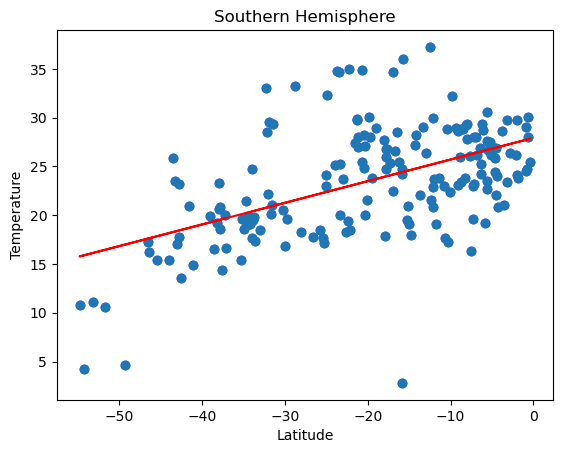

In [25]:
# Linear regression on Southern Hemisphere
x_valuesST = southern_hemi_df['lat']
y_valuesST = southern_hemi_df['Max Temp']
plt.scatter(x_valuesST,y_valuesST, c='blue')

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesST, y_valuesST)
regress_values = x_valuesST * slope + intercept
print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_valuesST, y_valuesST)
plt.plot(x_valuesST, regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE
# The farther away from the equater the cooler the average temperatures get cooler. The Northern Hemisphere
# indicates that with a downward linear regression.
# The graph for the Southern Hemisphere is showing an upward linear regression because of the x axis starting
# farther away from the equater.
# This appears to make accurate.

### Humidity vs. Latitude Linear Regression Plot

City_ID
3      75.595880
4      84.595120
5      81.481599
6      85.629385
7      75.864492
         ...    
560    67.926215
561    77.940367
562    64.365552
564    76.503339
565    75.290388
Name: lat, Length: 389, dtype: float64
y =0.39x +59.82
The r-value is: 0.13267389129451487


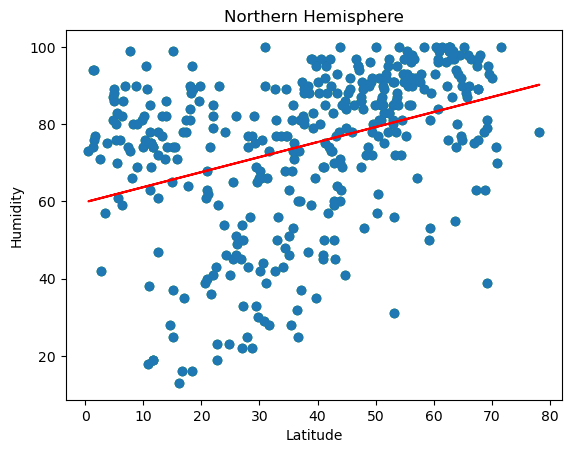

In [26]:
x_valuesNH = northern_hemi_df['lat']
y_valuesNH = northern_hemi_df['Humidity']
plt.scatter(x_valuesNH,y_valuesNH,c='green')

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesNH, y_valuesNH)
regress_values = x_valuesNH * slope + intercept
print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_valuesNH, y_valuesNH)
plt.plot(x_valuesNH, regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      74.899203
1      78.075947
2      74.665189
9      70.298387
11     84.821043
         ...    
543    78.180691
550    83.411042
558    82.303321
559    75.594434
563    73.909161
Name: lat, Length: 177, dtype: float64
y =0.3x +85.04
The r-value is: 0.06130921370674216


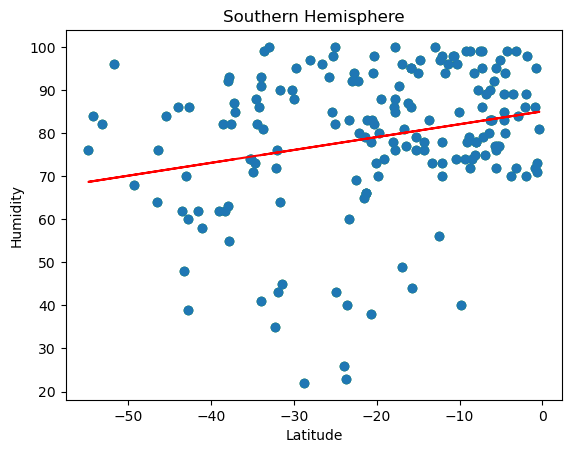

In [27]:
# Southern Hemisphere
x_valuesSH = southern_hemi_df['lat']
y_valuesSH = southern_hemi_df['Humidity']
plt.scatter(x_valuesSH,y_valuesSH,c='green')

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesSH, y_valuesSH)
regress_values = x_valuesSH * slope + intercept
print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_valuesSH, y_valuesSH)
plt.plot(x_valuesSH, regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE
# Both of humidity doesn't seem to correlate well when we compare the Nothern Hemisphere
# and the Southern hemisphere. In the North humidity rises on the average the farther you 
# get from the equater and in the South its showing the opposite. This is interesting
# I'm not sure if this is an accurate representation of latitude verses humidity.
    

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
3      61.614586
4      78.275723
5      72.511370
6      80.190554
7      62.111892
         ...    
560    47.415016
561    65.955154
562    40.822826
564    63.294650
565    61.049000
Name: lat, Length: 389, dtype: float64
y =0.72x +32.4
The r-value is: 0.12838564337009545


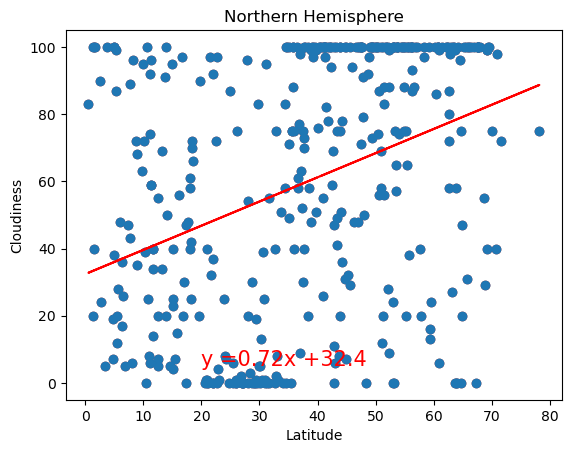

In [28]:
x_valuesNC = northern_hemi_df['lat']
y_valuesNC = northern_hemi_df['Cloudiness']
plt.scatter(x_valuesNC,y_valuesNC, c='brown')

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesNC, y_valuesNC)
regress_values = x_valuesNC * slope + intercept
print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_valuesNC, y_valuesNC)
plt.plot(x_valuesNC, regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      67.891235
1      72.554299
2      67.547732
9      61.137811
11     82.455258
         ...    
543    72.708050
550    80.385553
558    78.759556
559    68.911748
563    66.437977
Name: lat, Length: 177, dtype: float64
y =0.44x +82.78
The r-value is: 0.03447481846669136


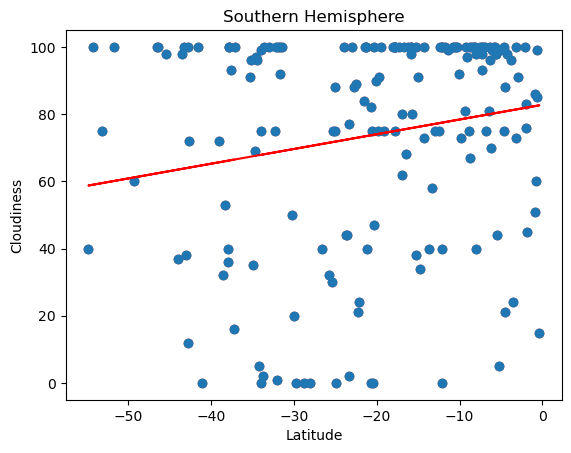

In [29]:
# Southern Hemisphere
x_valuesSC = southern_hemi_df['lat']
y_valuesSC = southern_hemi_df['Cloudiness']
plt.scatter(x_valuesSC,y_valuesSC, c='brown')

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesSC, y_valuesSC)
regress_values = x_valuesSC * slope + intercept
print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_valuesSC, y_valuesSC)
plt.plot(x_valuesSC, regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE
# Cloudiness is showing the same results as humidity in my previous observation.
# More cloudiness = more humidity. That seems to make sense. I'm still not 
# convinced this is a consistant observation.

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
3      3.589049
4      3.914923
5      3.802178
6      3.952375
7      3.598775
         ...   
560    3.311320
561    3.673946
562    3.182384
564    3.621909
565    3.577986
Name: lat, Length: 389, dtype: float64
y =0.01x +3.02
The r-value is: 0.009600140970798558


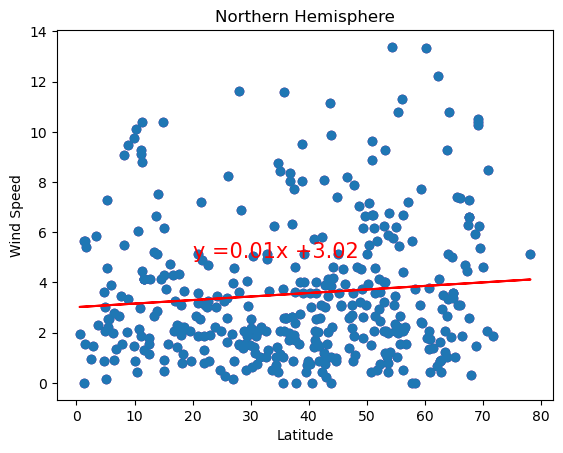

In [30]:
x_valuesNW = northern_hemi_df['lat']
y_valuesNW = northern_hemi_df['Wind Speed']
plt.scatter(x_valuesNW,y_valuesNW, c="purple")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesNW, y_valuesNW)
regress_values = x_valuesNW * slope + intercept
print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_valuesNW, y_valuesNW)
plt.plot(x_valuesNW, regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      4.139856
1      3.503395
2      4.186741
9      5.061631
11     2.152013
         ...   
543    3.482409
550    2.434507
558    2.656439
559    4.000567
563    4.338211
Name: lat, Length: 177, dtype: float64
y =-0.06x +2.11
The r-value is: 0.12904308562092323


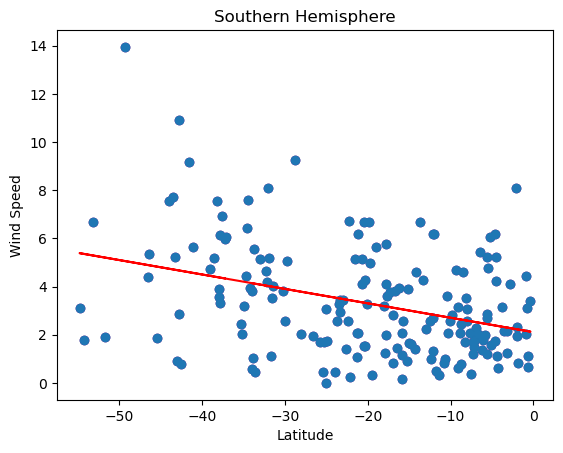

In [31]:
# Southern Hemisphere
x_valuesSW = southern_hemi_df['lat']
y_valuesSW = southern_hemi_df['Wind Speed']
plt.scatter(x_valuesSW,y_valuesSW, c="purple")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesSW, y_valuesSW)
regress_values = x_valuesSW * slope + intercept
print(regress_values)

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_valuesSW, y_valuesSW)
plt.plot(x_valuesSW, regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE
# Wind speed in the North is slightly increasing as you move away from the 
# equator. In the South wind speed is increasing as you get closer to the 
# equator. Does this mean that wind increases from the South Pole to the North.
# I don't believe that's an accurate statement. These two relationships don't
# seem to correlate well.